In [55]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav

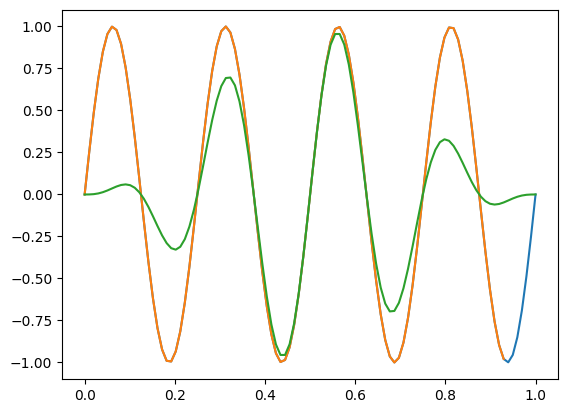

In [169]:
fs = 4

x = np.linspace(0, 1, 100)
y = lambda v: np.sin(np.pi*2*fs*v)

leck = y(x[:-7])
window = y(x) * np.hanning(len(x))

plt.plot(x, y(x))
plt.plot(x[:-7], leck)
plt.plot(x, window)

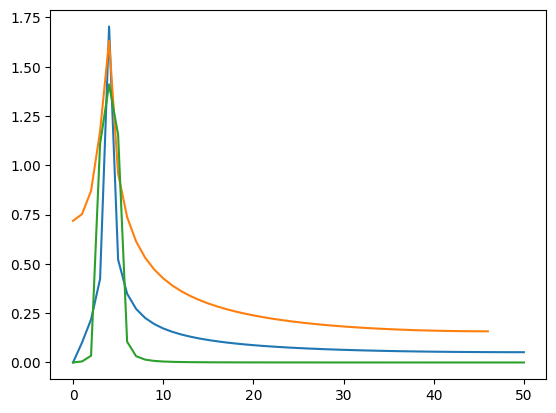

In [177]:
ft = np.abs(np.fft.rfft(y(x), n=len(x)))
ft_leck = np.abs(np.fft.rfft(leck, n=len(x[:-7])))
window_ft = np.abs(np.fft.rfft(window, n=len(x)))

plt.plot(np.log10(ft + 1))
plt.plot(np.log10(ft_leck + 1))
plt.plot(np.log10(window_ft+ 1))


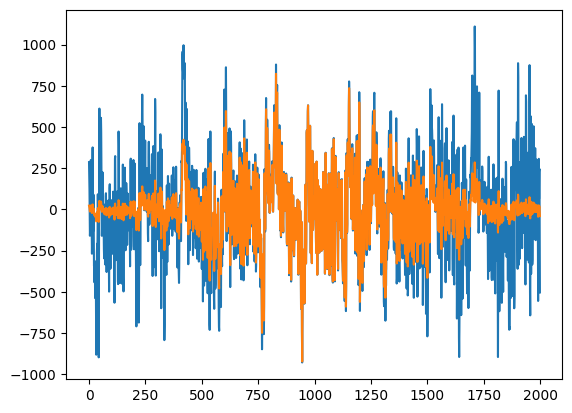

In [171]:
sample_rate, signal = wav.read("C:/Users/felix/Music/californiagirls.wav")

import processing, dsp.filter as filter
pre_emphasis = filter.SimplePreEmphasis()
mono = processing.stereo_to_mono(signal)

data = pre_emphasis.filter(mono)

frame = data[sample_rate*4:sample_rate*4+2000]
fenster = frame*np.hamming(len(frame))
frame2 = data[sample_rate*4-1000:sample_rate*4+3000]
fenster2 = frame2 * np.hanning(len(frame2))

plt.plot(frame)
plt.plot(fenster)
#plt.plot(fenster2)

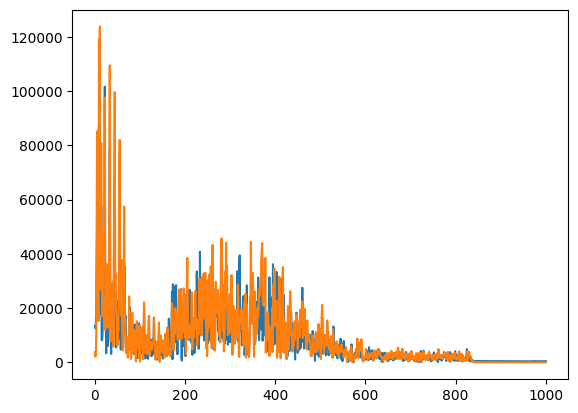

In [172]:
ft = np.abs(np.fft.rfft(frame, n=len(frame)))
ft_fenster = np.abs(np.fft.rfft(fenster, n=1024))
ft_fenster2 = np.abs(np.fft.rfft(fenster2, n=len(frame)))
plt.plot(ft)
#plt.plot(ft_fenster)
plt.plot(ft_fenster2*2)